In [6]:
import os
import pprint
import numpy as np
import matplotlib.pyplot as plt
from evaluator import cache_hit_rate_evaluator, measure_chr_by_checkpoints, plot_hit_rates, show_result
from utils import save_pickle, load_pickle
from IPython.display import JSON
from typing import Dict, List
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
eval_config = {
    "filepath": "./dataset/wiki2018_valid.tr",
    "window_size": 50000,
    "capacity": 500000000,
    "access_history_len": 20,
    "scorer_type": "learned"
}

checkpoint_path_prefix = './result/checkpoints/model_'
checkpoints = [f"{checkpoint_path_prefix}{x}.ckpt" for x in range(30, 301, 30)]

# mesure cache hit rate by checkpoints
map_checkpoint_to_chr = measure_chr_by_checkpoints(eval_config, checkpoints)

In [4]:
for checkpoint, hit_rates in map_checkpoint_to_chr.items():
    print(f"{checkpoint}: {np.mean(hit_rates)}")

./result/checkpoints/model_30.ckpt: 0.1890119693923418
./result/checkpoints/model_60.ckpt: 0.18882203432398334
./result/checkpoints/model_90.ckpt: 0.20588709692897952
./result/checkpoints/model_120.ckpt: 0.2061966103397777
./result/checkpoints/model_150.ckpt: 0.21210130617531348
./result/checkpoints/model_180.ckpt: 0.21312054571064384
./result/checkpoints/model_210.ckpt: 0.2148520070184799
./result/checkpoints/model_240.ckpt: 0.21480030026957508
./result/checkpoints/model_270.ckpt: 0.21543769972067445
./result/checkpoints/model_300.ckpt: 0.2168390938913211


In [7]:
# save cache hit rate by checkpoints
map_checkpoint_to_chr_file_path = "./result/cache_hit_rates_by_learned_policy_non_dagger.pkl"
save_pickle(map_checkpoint_to_chr, map_checkpoint_to_chr_file_path)

In [8]:
# measure cache hit rate by LRU
eval_config_lru = {
    "filepath": "./dataset/wiki2018_valid.tr",
    "window_size": 50000,
    "capacity": 500000000,
    "access_history_len": 20,
    "scorer_type": "lru"
}

evaluator = cache_hit_rate_evaluator(eval_config_lru,
                                     None, None,
                                     max_examples=5000)

hit_rates_lru = []
step = 0
for hit_rates in evaluator:
    step += 1
    print(f"step {step}: {np.mean(hit_rates)}")
    hit_rates_lru.append(np.mean(hit_rates))

# Print all hit rates
print(hit_rates_lru)
# Print average hit rate
print(f"Average hit rate: {np.mean(hit_rates_lru)}")

Evaluating the model...: 5201it [00:02, 1102.53it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10087it [00:09, 517.44it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15076it [00:21, 401.96it/s]

step 3: 0.29821851554986323


Evaluating the model...: 20048it [00:34, 383.29it/s]

step 4: 0.30872033588566716


Evaluating the model...: 25052it [00:48, 342.16it/s]

step 5: 0.30101864561233693


Evaluating the model...: 30042it [01:02, 338.53it/s]

step 6: 0.32701500365851066


Evaluating the model...: 35066it [01:16, 339.08it/s]

step 7: 0.3954180474529018


Evaluating the model...: 40056it [01:30, 348.14it/s]

step 8: 0.42432807656850513


Evaluating the model...: 45073it [01:44, 388.22it/s]

step 9: 0.4515188352965854


Evaluating the model...: 50000it [01:56, 428.88it/s]

step 10: 0.43164339497813514
[0.11371902854355612, 0.26640143850599163, 0.29821851554986323, 0.30872033588566716, 0.30101864561233693, 0.32701500365851066, 0.3954180474529018, 0.42432807656850513, 0.4515188352965854, 0.43164339497813514]
Average hit rate: 0.3318001322052053


In [9]:
hit_rates_lru_file_path = "./result/cache_hit_rates_by_lru_for_comparing_to_learned_policy_non_dagger.pkl"
save_pickle(hit_rates_lru, hit_rates_lru_file_path)

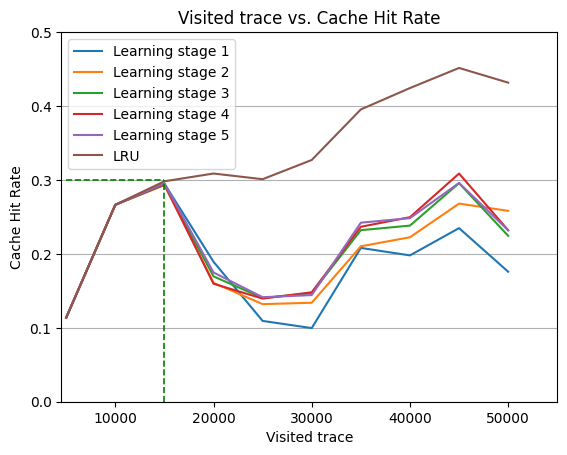

In [52]:
# Plot cache hit rates by lru and learned policy
trace_boundaries = [5000*i for i in range(1, 11)]
odds = {checkpoint: hit_rates for i, (checkpoint, hit_rates) in enumerate(map_checkpoint_to_chr.items()) if i % 2 == 0}
for i, (checkpoint, hit_rates) in enumerate(odds.items()):
    plt.plot(trace_boundaries, hit_rates, label=f"Learning stage {i+1}")

plt.axis([4500, 55000, 0, 0.5])
plt.xlabel('Visited trace')
plt.ylabel('Cache Hit Rate')
plt.title('Visited trace vs. Cache Hit Rate')
plt.plot(trace_boundaries, hit_rates_lru, label="LRU")
plt.plot([5000, 15000], [0.3, 0.3], 'g--', linewidth=1.2)
plt.plot([15000, 15000], [0, 0.3], 'g--', linewidth=1.2)
plt.legend(loc="best")
plt.grid(linestyle='-', axis='y')
plt.show()

In [ ]:
# measure hit rate by learned policy with dagger
eval_config_dagger = {
    "filepath": "./dataset/wiki2018_valid.tr",
    "window_size": 50000,
    "capacity": 500000000,
    "access_history_len": 20,
    "scorer_type": "learned",
}

# update_frequency: 30, num_steps: 300
checkpoint_path_prefix = './result/checkpoints/model_20230822110424_'
checkpoints = [f"{checkpoint_path_prefix}{x}.ckpt" for x in range(30, 301, 30)]

# mesure cache hit rate by checkpoints
map_checkpoint_to_chr_dagger = measure_chr_by_checkpoints(eval_config_dagger, checkpoints)

# save cache hit rate by checkpoints
map_checkpoint_to_chr_dagger_file_path = "./result/cache_hit_rates_by_learned_policy_dagger.pkl"
save_pickle(map_checkpoint_to_chr_dagger, map_checkpoint_to_chr_dagger_file_path)

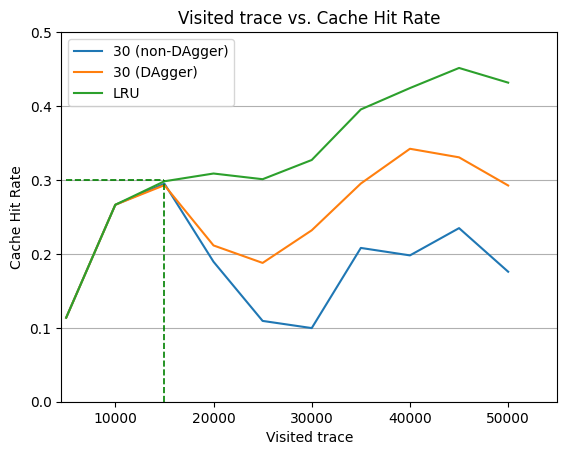

In [19]:
map_label_to_hit_rates = {}

# non dagger
map_checkpoint_to_chr_file_path = "./result/cache_hit_rates_by_learned_policy_non_dagger.pkl"
result_non_dagger = load_pickle(map_checkpoint_to_chr_file_path)
checkpoint, hit_rates = list(result_non_dagger.items())[0]
stage = checkpoint.split("_")[1].split(".")[0] + " (non-DAgger)"
map_label_to_hit_rates[stage] = hit_rates

# dagger
result_dagger = load_pickle( "./result/cache_hit_rates_by_learned_policy_dagger.pkl")
checkpoint, hit_rates = list(result_dagger.items())[0]
stage = checkpoint.split("_")[2].split(".")[0] + " (DAgger)"
map_label_to_hit_rates[stage] = hit_rates

# lru
result_lru = load_pickle( "./result/cache_hit_rates_by_lru_for_comparing_to_learned_policy_non_dagger.pkl")
map_label_to_hit_rates["LRU"] = result_lru

# plot hit rates
plot_hit_rates(map_label_to_hit_rates)

In [ ]:
# measure hit rate by learned policy with dagger
eval_config_dagger = {
    "filepath": "./dataset/wiki2018_valid.tr",
    "window_size": 50000,
    "capacity": 500000000,
    "access_history_len": 20,
    "scorer_type": "learned",
}

# update_frequency: 40, num_steps: 1000
# checkpoint_path_prefix = './result/checkpoints/model_20230822220335_'
# checkpoints = [f"{checkpoint_path_prefix}{x}.ckpt" for x in [50,400]]

# update_frequency: 20, num_steps: 1000, batch_size: 16
# checkpoint_path_prefix = './result/checkpoints/model_20230823020957_'
checkpoints = [f"{checkpoint_path_prefix}{x}.ckpt" for x in [50,100]]

# mesure cache hit rate by checkpoints
measure_chr_by_checkpoints(eval_config_dagger, checkpoints)

{   'dagger_schedule': {   'final': 1.0,
                           'initial': 0.0,
                           'num_steps': 2400,
                           'type': 'linear',
                           'update_frequency': 20},
    'dataset': {   'access_history_len': 1,
                   'capacity': 500000000,
                   'filepath': './dataset/wiki2018_dev_one_million.tr',
                   'scorer_type': 'mixture',
                   'window_size': 550000},
    'experiment': {'base_dir': './experiments', 'name': 'test'},
    'model': {   'cache_lines_embedder': 'obj_id_embedder',
                 'lstm_hidden_size': 32,
                 'max_attention_history': 20,
                 'obj_id_embedder': {   'embedding_dim': 16,
                                        'max_vocab_size': 10000,
                                        'type': 'dynamic_vocab'},
                 'obj_size_embedder': {   'embedding_dim': 32,
                                          'max_size': 100000

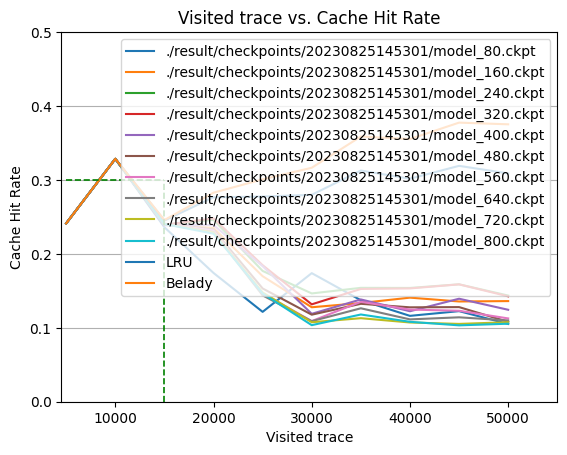

In [19]:
show_result('20230825145301', show_benchmark=True)